# Face Encoding usin DLIB and MediaPipe

In [58]:
#Importing Necessary Libraries
import dlib
import matplotlib.pyplot as plt
import mediapipe as mp
import cv2
import warnings
warnings.filterwarnings('ignore')

# Using dlib Library

## Face Encoding using dlib of single face

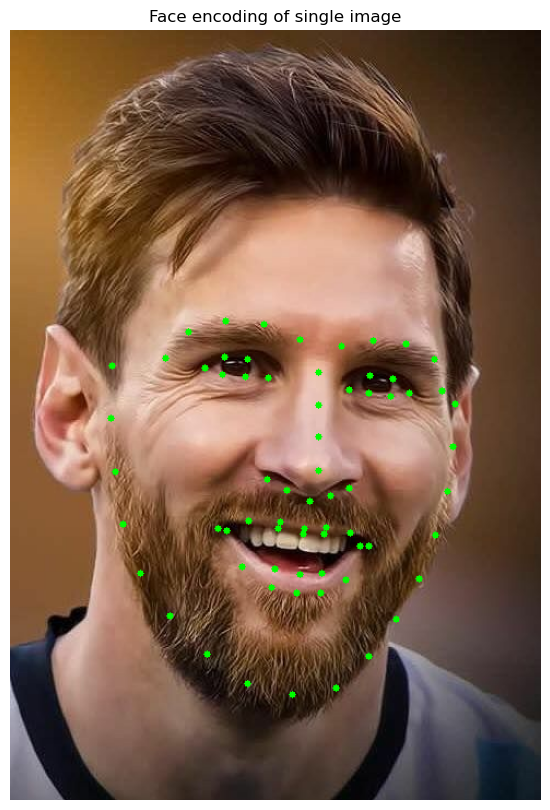

In [59]:
def single_face_encoding(image_path):
    #Load the image
    image = cv2.imread(image_path)

    #Covert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #Initalizing dlib frontal face detector and facial landmark predictor
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("/Users/shriyansh/Documents/Data Science/projects/OPENCv/Face recognition/shape_predictor_68_face_landmarks.dat")

    #Detecting face using detector
    faces = detector(gray)

    for face in faces:
        #Get the landmarks on face
        landmarks = predictor(gray, face)

        #
        for i in range(0,68):
            x = landmarks.part(i).x
            y = landmarks.part(i).y
            cv2.circle(image, center= (x,y), radius = 3 , color = (0,255,0), thickness=-1)

    # Display the result
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
    plt.title("Face encoding of single image")
    plt.axis('off')
    plt.show()

# Run the function with the image path
single_face_encoding("/Users/shriyansh/Documents/Data Science/projects/OPENCv/Face recognition/images/messi.jpg")

## Face Encoding using dlib of multiple faces

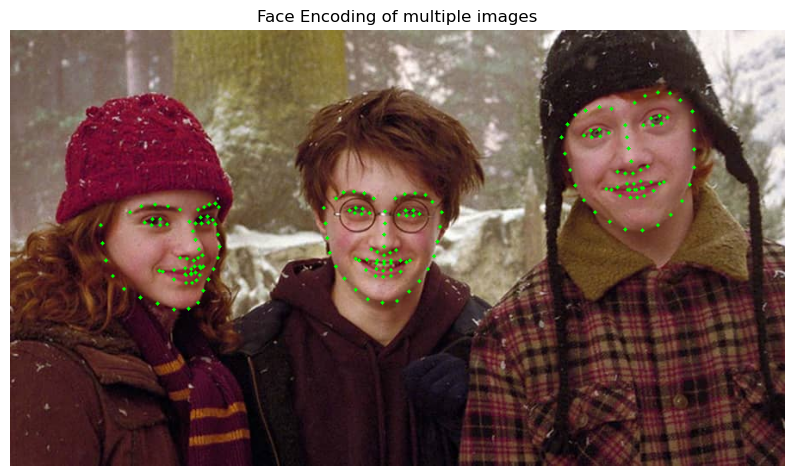

In [3]:
def multiple_face_encoding(image_path):
    #Load the image
    image = cv2.imread(image_path)

    #Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #Initializing Dlib front face detector and facial landmark prediction
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("/Users/shriyansh/Documents/Data Science/projects/OPENCv/Face recognition/shape_predictor_68_face_landmarks.dat")

    faces = detector(gray)

    for face in faces:

        landmarks = predictor(gray, face)

        for i in range(0,68):
            x = landmarks.part(i).x
            y = landmarks.part(i).y
            cv2.circle(image, center = (x,y), radius=2, color= (0,255,0), thickness=-1)

    #Display the Figure
    plt.figure(figsize=(10,10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Face Encoding of multiple images")
    plt.axis('off')

multiple_face_encoding("/Users/shriyansh/Documents/Data Science/projects/OPENCv/Face recognition/images/1662029829_harry-potter.jpg")

## Real Time Face Encoding using Dlib

In [4]:
def real_time_face_encoding():
    #Intialize video Capture
    cap= cv2.VideoCapture(0)

    #Infinite loop to keep capturing video frames
    while True:
        #Read the frame from the camera
        r,frame = cap.read()

        if not r:
            print("Frame is not captured.")
            
        #Convert the frame into gray scale 
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        #Intializing face detector and facial landmark predictor
        detector = dlib.get_frontal_face_detector()
        predictor = dlib.shape_predictor("/Users/shriyansh/Documents/Data Science/projects/OPENCv/Face recognition/shape_predictor_68_face_landmarks.dat")

        #Detecting the faces 
        faces = detector(gray)

        #Placing landmarks on the image
        for face in faces:
            landmarks = predictor(gray,face)
            for i in range(0,68):
                x = landmarks.part(i).x
                y = landmarks.part(i).y
                cv2.putText(frame, text=str(i), org=(x, y), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.7, color=(0, 255, 0), thickness=2)
                cv2.circle(frame,center = (x,y), radius = 2, color = (0,255,0),thickness=-1)

        cv2.imshow("Real Time Face Encoding", frame)
        if cv2.waitKey(2) & 0xff == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

real_time_face_encoding()

# Using MediaPipe Library

## Single Image Encoding

I0000 00:00:1740991503.575759  133210 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M2
W0000 00:00:1740991503.577474  192780 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740991503.584554  192780 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


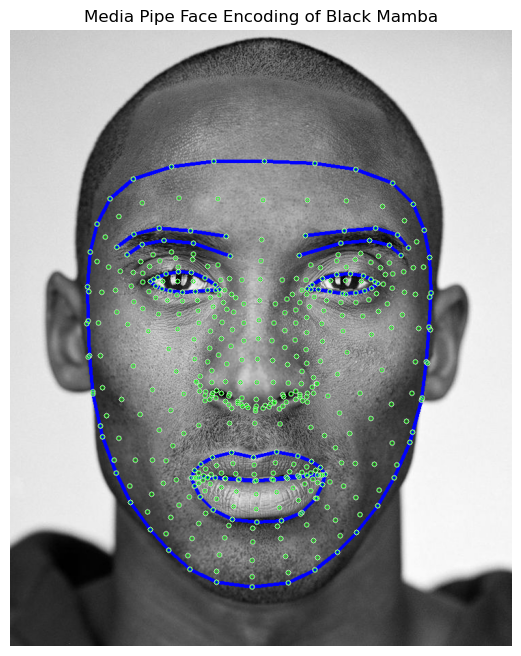

In [41]:
def single_image_mediapipe(image_path):
    # Load the image from the specified path
    image = cv2.imread(image_path)

    # Import MediaPipe face mesh and drawing utilities
    mp_face_mesh = mp.solutions.face_mesh
    mp_drawing = mp.solutions.drawing_utils

    # Initialize MediaPipe Face Mesh with specified settings
    face_mesh = mp_face_mesh.FaceMesh(
        max_num_faces=4,  
        refine_landmarks=True,  
        min_detection_confidence=0.5,  
        min_tracking_confidence=0.5 
    )
    
    # Set drawing specifications for drawing landmarks and connections
    drawing_landmarks = mp_drawing.DrawingSpec(thickness=1, circle_radius=3, color=(0,255,0))  # green circles for landmarks
    connecting_landmarks = mp_drawing.DrawingSpec(thickness=3, circle_radius=1, color=(0,0,255))  # blue lines for connections

    # Convert the image from BGR to RGB format for MediaPipe processing
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process the image to find face landmarks
    results = face_mesh.process(image)

    # Convert the image back to BGR format for displaying with OpenCV
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Draw the landmarks and their connections on the image if faces are detected
    if results.multi_face_landmarks:
        for i in results.multi_face_landmarks:
            mp_drawing.draw_landmarks(
                image=image, 
                landmark_list=i,
                connections=mp_face_mesh.FACEMESH_CONTOURS,
                landmark_drawing_spec=drawing_landmarks,
                connection_drawing_spec=connecting_landmarks
            )

    # Display the processed image with landmarks
    plt.figure(figsize=(8,8))
    plt.imshow(image)
    plt.title("Media Pipe Face Encoding of Black Mamba")  
    plt.axis('off') 
    

single_image_mediapipe("/Users/shriyansh/Documents/Data Science/projects/OPENCv/Face recognition/images/fd68fe3ea4592af8143a02fd508a0616.jpg")

## Multiple Image encoding

I0000 00:00:1740993494.655308  133210 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M2
W0000 00:00:1740993494.656881  214165 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740993494.664032  214165 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


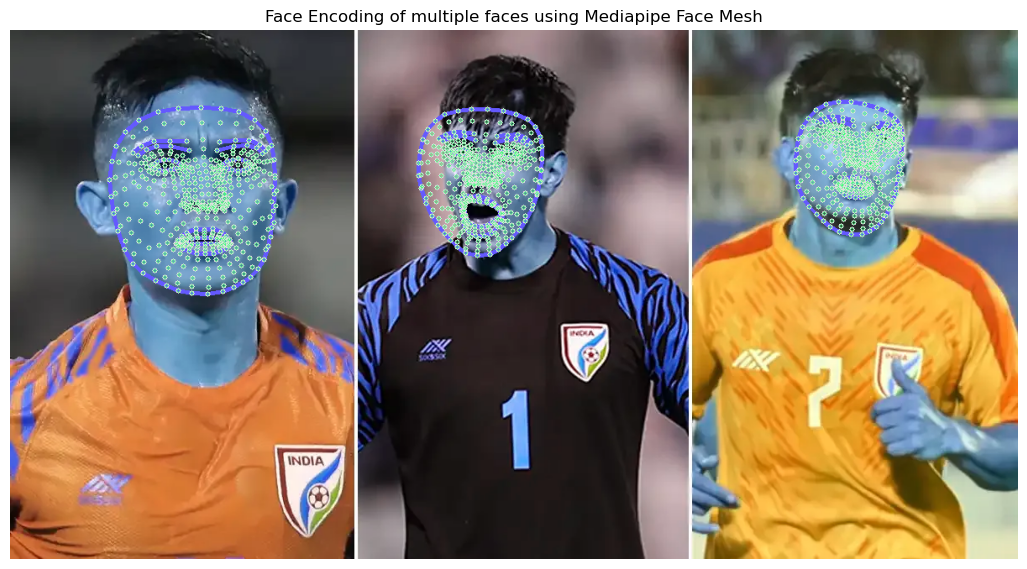

In [64]:
def multiple_face_mediapipe(image_path):
    # Load the image
    image = cv2.imread(image_path)

    #Import Mediapipe face mesh and drawing utilities
    mp_face_mesh = mp.solutions.face_mesh
    mp_drawing = mp.solutions.drawing_utils

    #Initialize face mesh with specified settings
    face_mesh = mp_face_mesh.FaceMesh(
        max_num_faces=4,
        refine_landmarks = True,
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5
    )

    # Set drawing specifications for drawing landmarks and connection
    landmark_draw = mp_drawing.DrawingSpec(thickness=1, circle_radius =2, color = (60,255,120))
    connection_draw = mp_drawing.DrawingSpec(thickness=3, circle_radius =1, color = (100,89,255))

    # Convert the image from BGR to RGB format for MediaPipe processing
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process the image to find face landmarks
    results = face_mesh.process(image)

    # Convert the image back to BGR format for displaying with OpenCV
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    #Draw the landmarks and connection if face is detected
    if results.multi_face_landmarks:
        for i in results.multi_face_landmarks:
            mp_drawing.draw_landmarks(
                image=image,
                landmark_list=i,
                connections = mp_face_mesh.FACEMESH_CONTOURS,
                landmark_drawing_spec =landmark_draw,
                connection_drawing_spec = connection_draw
            )
    plt.figure(figsize=(13,10))
    plt.imshow(image)
    plt.axis('off')
    plt.title("Face Encoding of multiple faces using Mediapipe Face Mesh")
    plt.show()
    
multiple_face_mediapipe("/Users/shriyansh/Documents/Data Science/projects/OPENCv/Face recognition/images/best-football-players-from-india-1720944539269-original.webp")

# Real Time Face Encoding

In [66]:
def real_time_encoding_mediapipe():
    
    #Import Mediapipe Face Mesh and Drawwing Utilities
    mp_face_mesh = mp.solutions.face_mesh
    mp_drawing = mp.solutions.drawing_utils

    face_mesh  = mp_face_mesh.FaceMesh(
        max_num_faces = 4,
        refine_landmarks = True,
        min_detection_confidence = 0.5,
        min_tracking_confidence  = 0.5
    )

    landmark_draw = mp_drawing.DrawingSpec(thickness=1, circle_radius=2, color = (0,255,0))
    connection_draw = mp_drawing.DrawingSpec(thickness=2, circle_radius=1, color=(0,0,255))
    
    #Capturing the camera
    cap = cv2.VideoCapture(0)

    #Ensuring the proper working of camera
    if not cap.isOpened():
        print("Camera is not working.")
    
    #Iterating infinte loop through each and every frame
    while True:
        r,frame = cap.read()

        if not r:
            print("Frame is not Captured.")

        frame.flags.writeable = False
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = face_mesh.process(frame)

        frame.flags.writeable= True
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        
        if results.multi_face_landmarks:
            for i in results.multi_face_landmarks:
                mp_drawing.draw_landmarks(
                    image = frame, 
                    landmark_list = i,
                    connections = mp_face_mesh.FACEMESH_CONTOURS,
                    landmark_drawing_spec = landmark_draw,
                    connection_drawing_spec = connection_draw
                )

        cv2.imshow("Real Time Encoding with MediaPipe", frame)
        if cv2.waitKey(7) & 0xff == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

real_time_encoding_mediapipe()

I0000 00:00:1740993596.566508  133210 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M2
W0000 00:00:1740993596.568214  215122 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740993596.575754  215124 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
